<a href="https://colab.research.google.com/github/sridevi0323/Animal-Hide---DL/blob/main/ResNet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your desired directory
path_to_directory = '/content/drive/MyDrive/Leather_Dataset'

# Change the working directory to the specified path
os.chdir(path_to_directory)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/Leather_Dataset'
validation_dir = '/content/drive/MyDrive/Leather_Dataset'
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
  train_generator = datagen.flow_from_directory(
      train_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical'
  )

  validation_generator = datagen.flow_from_directory(
      validation_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical'
  )

Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # Two classes: healthy skin and diseased skin
])

94765736/94765736 [==============================] - 4s 0us/step


Epoch 1/20
37/37 [==============================] - 673s 18s/step - loss: 0.7310 - accuracy: 0.4923 - val_loss: 0.6939 - val_accuracy: 0.5025
Epoch 2/20
37/37 [==============================] - 513s 14s/step - loss: 0.6958 - accuracy: 0.5223 - val_loss: 0.6943 - val_accuracy: 0.5025
Epoch 3/20
37/37 [==============================] - 513s 14s/step - loss: 0.6909 - accuracy: 0.5325 - val_loss: 0.6959 - val_accuracy: 0.5008
Epoch 4/20
37/37 [==============================] - 514s 14s/step - loss: 0.6992 - accuracy: 0.5274 - val_loss: 0.7088 - val_accuracy: 0.4983
Epoch 5/20
37/37 [==============================] - 515s 14s/step - loss: 0.6892 - accuracy: 0.5223 - val_loss: 0.7369 - val_accuracy: 0.5008
Epoch 6/20
37/37 [==============================] - 513s 14s/step - loss: 0.6925 - accuracy: 0.5334 - val_loss: 0.6886 - val_accuracy: 0.5008
Epoch 7/20
37/37 [==============================] - 514s 14s/step - loss: 0.6862 - accuracy: 0.5634 - val_loss: 0.6819 - val_accuracy: 0.5405
Epoch 

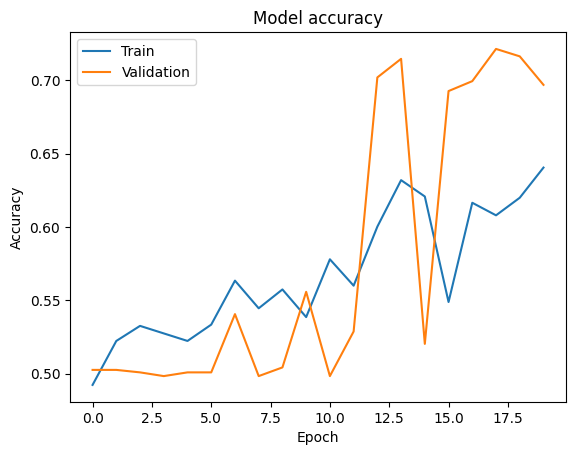

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=20  # You can adjust the number of epochs
)
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


38/38 [==============================] - 261s 7s/step


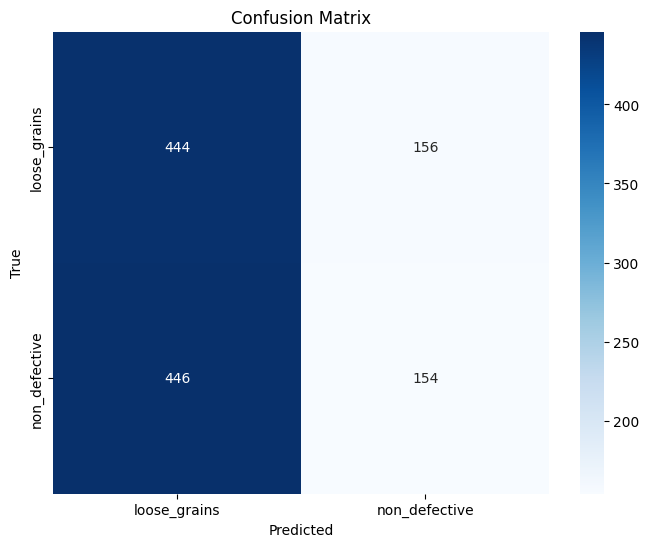

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Generate predictions from the model for the validation data
validation_preds = model.predict(validation_generator)
validation_preds = np.argmax(validation_preds, axis=1)

# Get the true labels from the validation data generator
validation_true_labels = validation_generator.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(validation_true_labels, validation_preds)

# Define the class labels
class_labels = ['loose_grains', 'non_defective']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions from the model for the validation data
validation_preds = model.predict(validation_generator)
validation_preds = np.argmax(validation_preds, axis=1)

# Get the true labels from the validation data generator
validation_true_labels = validation_generator.classes

# Generate a classification report
report = classification_report(validation_true_labels, validation_preds, target_names=class_labels)

# Print the classification report
print(report)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Generate predictions from the model for the validation data
validation_preds = model.predict(validation_generator)
validation_preds = np.argmax(validation_preds, axis=1)

# Get the true labels from the validation data generator
validation_true_labels = validation_generator.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(validation_true_labels, validation_preds)

# Define the class labels
class_labels = ['Healthy Skin', 'Diseased Skin']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


28/38 [=====================>........] - ETA: 1:09

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-b311357c1f1b>", line 6, in <cell line: 6>
    validation_preds = model.predict(validation_generator)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 60, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Leather_Dataset/loose_grains/loosegrains921.jpg'
Traceback (most recent call last):

 

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions from the model for the validation data
validation_preds = model.predict(validation_generator)
validation_preds = np.argmax(validation_preds, axis=1)

# Get the true labels from the validation data generator
validation_true_labels = validation_generator.classes

# Generate a classification report
report = classification_report(validation_true_labels, validation_preds, target_names=class_labels)

# Print the classification report
print(report)
